In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""path_list = ['../high_gremline_mask_50_100_outward_wbos_eos.hdf5',
         'results/pair_50_100_outward_wbos_eos_randommask.hdf5',
           'results/pair_50_100_outward_wbos_eos_randommask_no_unmask_within30.hdf5']"""

path_list = ['../high_gremline_mask_100_outward_wbos_eos.hdf5',
         'results/pair_100_outward_wbos_eos_randommask.hdf5',
            'results/pair_100_outward_wbos_eos_randommask_no_unmask_within30.hdf5',]

304
266
304
266
304
266


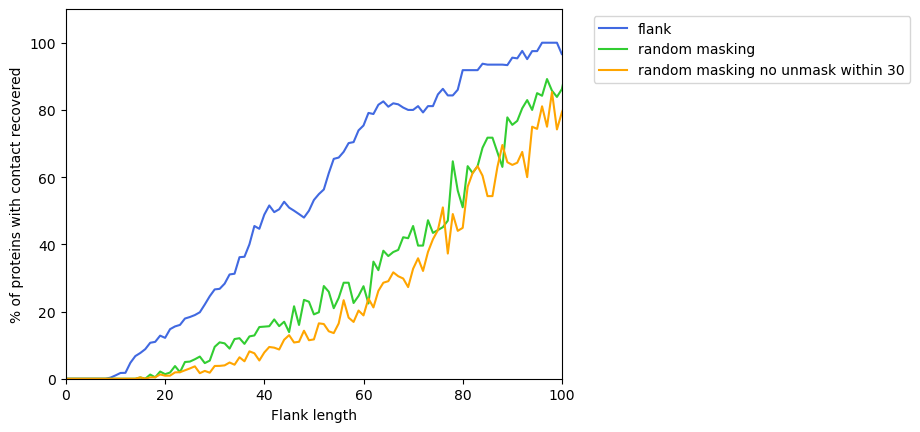

In [3]:

file_labels = {
    path_list[0]: "flank",
    path_list[1]: "random masking",
    path_list[2]: "random masking no unmask within 30",
}

file_styles = {
    path_list[0]:  {'color': 'royalblue', 'linestyle': '-'},
    path_list[1]: {'color': 'limegreen', 'linestyle': '-'},
    path_list[2]: {'color': 'orange', 'linestyle': '-'}
}



#title = '30_100_outward'
threshold = 0.5

def calculate_percentages(filename):
    f = h5py.File(filename, 'r')

    flank_lengths = set()
    data = {}
    pos_count = 0 

    for protein_name in f.keys():
        for pos in f[protein_name].keys():
            pos_count = pos_count + 1 
            for flank_len in f[protein_name][pos].keys():
                flank_lengths.add(flank_len)
                key = f'{protein_name}/{pos}/{flank_len}/sum_mult'
                norm_sum_mult_value = f[key][()]

                if flank_len not in data:
                    data[flank_len] = [norm_sum_mult_value]
                else:
                    data[flank_len].append(norm_sum_mult_value)
    print(pos_count) 
    print(len(f.keys()))

    percentages = {}
    flank_datapoints = {}
    for flank_len in flank_lengths:
        values = np.array(data[flank_len])
        flank_datapoints[flank_len] = len(values) 
        percentage = np.sum(values > threshold) / len(values) * 100
        percentages[flank_len] = percentage
    
    return percentages, flank_lengths, flank_datapoints


for filename, label in file_labels.items():
    percentages, flank_lengths, flank_datapoints = calculate_percentages(filename)
    #print(flank_datapoints)

    flank_lengths = sorted([int(x) for x in list(flank_lengths)])
    percentage_values = [percentages[str(flank_len)] for flank_len in flank_lengths]
    style = file_styles[filename]
    plt.plot(flank_lengths, percentage_values, label=label, color=style['color'], linestyle=style['linestyle'])

plt.xlabel('Flank length')
plt.ylabel('% of proteins with contact recovered')
#plt.title(title)
plt.xlim(0, 100) 
plt.ylim(0, 110)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('figures_manuscript/pair_recovery_mask_wbos_eos_flank_random_50_100.svg')
plt.savefig('figures_manuscript/pair_recovery_mask_wbos_eos_flank_random_100.svg')
plt.show()
